In [1]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import json
import seaborn as sns 
from seaborn import kdeplot
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots
import nbconvert as nb
import nbformat
%matplotlib inline 
import plot as pltt
import pycountry as pc 
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import os # accessing directory structure

In [2]:
go.FigureWidget

plotly.graph_objs._figurewidget.FigureWidget

In [53]:
hemp = pd.read_csv('/Users/rochi/Desktop/TestFolder/DataScienceBootCampMIO/Proyecto_covid/HEMP/hemp.csv')
hemp

,class_code;class_desc;wkt_geometry;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 931,Unnamed: 932,Unnamed: 933,Unnamed: 934,Unnamed: 935,Unnamed: 936,Unnamed: 937,Unnamed: 938,Unnamed: 939,Unnamed: 940
0,8;80% suitability;POLYGON ((142.267673808829 -...,142.276818179231 -37.4744765905264,142.276942202947 -37.4817645693442,142.267796944889 -37.4818630696617,142.267673808829 -37.474575065062));;;;;;;;;;;...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6;60% suitability;POLYGON ((141.93468631905 -3...,141.94388507211 -37.9076728840386,141.94397820162 -37.9149611492324,141.934778541278 -37.9150345833115,141.93468631905 -37.9077462989726));;;;;;;;;;;...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6;60% suitability;POLYGON ((142.127296886796 -...,142.127185855009 -37.8623263971745,142.136378399183 -37.8622380278327,142.136490335994 -37.8695259036613,142.127296886796 -37.8696142960561));;;;;;;;;;...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6;60% suitability;POLYGON ((141.848807216931 -...,141.848724304406 -37.6314068375478,141.857889105295 -37.6313405529928,141.85797291287 -37.6386293333085,141.848807216931 -37.6386956351939));;;;;;;;;;...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8;80% suitability;POLYGON ((141.852400876218 -...,141.852316668367 -37.9448168354854,141.861520249163 -37.9447498026897,141.861605366043 -37.9520381873777,141.852400876218 -37.9521052376487));;;;;;;;;;...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844,7;70% suitability;MULTIPOLYGON (((142.37723293...,142.376628016565 -37.9597129139938,142.37569638905 -37.9597138650568,142.375444504436 -37.9597114000464,142.372358466247 -37.9597367566817,142.366517770394 -37.9597845431354,142.366061035682 -37.9598283109912,142.357215458176 -37.959910172133,142.350862524529 -37.959968567081,142.350496475446 -37.9599719210651,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
845,8;80% suitability;MULTIPOLYGON (((141.39824140...,141.397647887709 -37.3722985521587,141.397647959604 -37.3721164716733,141.397648288163 -37.3713595611999,141.398222550232 -37.3713576290611,141.398241409403 -37.3749250824594)),((141.846515097028 -37.1211431306439,141.849964119574 -37.1197438550873,141.850601986439 -37.1196112327851,141.85207763314 -37.1193794342384,...,(141.535903693639 -37.4655811066981,141.535955735449 -37.4728705917859,141.554247754142 -37.4727862053463,141.554193936378 -37.4654967423525,141.535903693639 -37.4655811066981),(141.59083155631 -37.4726089380119,141.609123334665 -37.4725160571938,141.609064189218 -37.465226664929;;;;;;;;;;;;;...,NaN,NaN
846,6;60% suitability;POLYGON ((142.376182933243 -...,142.376047227166 -37.8961245783432,142.403634677967 -37.8957987892029,142.403773102568 -37.9030858677476,142.41296972627 -37.9029758064537,142.412551884723 -37.8811146284568,142.421745740806 -37.8810039355073,142.42

In [54]:
hemp.shape

(849, 941)

In [55]:
hemp.columns

Index(['class_code;class_desc;wkt_geometry;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;',
       'Unnamed: 1', 'Un

In [13]:
hemp.dtypes

class_code;class_desc;wkt_geometry;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;    object
Unnamed: 1              

In [56]:
hemp.reset_index(drop=True, inplace=True)
hemp

,class_code;class_desc;wkt_geometry;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 931,Unnamed: 932,Unnamed: 933,Unnamed: 934,Unnamed: 935,Unnamed: 936,Unnamed: 937,Unnamed: 938,Unnamed: 939,Unnamed: 940
0,8;80% suitability;POLYGON ((142.267673808829 -...,142.276818179231 -37.4744765905264,142.276942202947 -37.4817645693442,142.267796944889 -37.4818630696617,142.267673808829 -37.474575065062));;;;;;;;;;;...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6;60% suitability;POLYGON ((141.93468631905 -3...,141.94388507211 -37.9076728840386,141.94397820162 -37.9149611492324,141.934778541278 -37.9150345833115,141.93468631905 -37.9077462989726));;;;;;;;;;;...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6;60% suitability;POLYGON ((142.127296886796 -...,142.127185855009 -37.8623263971745,142.136378399183 -37.8622380278327,142.136490335994 -37.8695259036613,142.127296886796 -37.8696142960561));;;;;;;;;;...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6;60% suitability;POLYGON ((141.848807216931 -...,141.848724304406 -37.6314068375478,141.857889105295 -37.6313405529928,141.85797291287 -37.6386293333085,141.848807216931 -37.6386956351939));;;;;;;;;;...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8;80% suitability;POLYGON ((141.852400876218 -...,141.852316668367 -37.9448168354854,141.861520249163 -37.9447498026897,141.861605366043 -37.9520381873777,141.852400876218 -37.9521052376487));;;;;;;;;;...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844,7;70% suitability;MULTIPOLYGON (((142.37723293...,142.376628016565 -37.9597129139938,142.37569638905 -37.9597138650568,142.375444504436 -37.9597114000464,142.372358466247 -37.9597367566817,142.366517770394 -37.9597845431354,142.366061035682 -37.9598283109912,142.357215458176 -37.959910172133,142.350862524529 -37.959968567081,142.350496475446 -37.9599719210651,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
845,8;80% suitability;MULTIPOLYGON (((141.39824140...,141.397647887709 -37.3722985521587,141.397647959604 -37.3721164716733,141.397648288163 -37.3713595611999,141.398222550232 -37.3713576290611,141.398241409403 -37.3749250824594)),((141.846515097028 -37.1211431306439,141.849964119574 -37.1197438550873,141.850601986439 -37.1196112327851,141.85207763314 -37.1193794342384,...,(141.535903693639 -37.4655811066981,141.535955735449 -37.4728705917859,141.554247754142 -37.4727862053463,141.554193936378 -37.4654967423525,141.535903693639 -37.4655811066981),(141.59083155631 -37.4726089380119,141.609123334665 -37.4725160571938,141.609064189218 -37.465226664929;;;;;;;;;;;;;...,NaN,NaN
846,6;60% suitability;POLYGON ((142.376182933243 -...,142.376047227166 -37.8961245783432,142.403634677967 -37.8957987892029,142.403773102568 -37.9030858677476,142.41296972627 -37.9029758064537,142.412551884723 -37.8811146284568,142.421745740806 -37.8810039355073,142.42

In [57]:
hemp.rename(columns={'class_code;class_desc;wkt_geometry;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;': 'Index'}, inplace=True)
hemp

,Index,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 931,Unnamed: 932,Unnamed: 933,Unnamed: 934,Unnamed: 935,Unnamed: 936,Unnamed: 937,Unnamed: 938,Unnamed: 939,Unnamed: 940
0,8;80% suitability;POLYGON ((142.267673808829 -...,142.276818179231 -37.4744765905264,142.276942202947 -37.4817645693442,142.267796944889 -37.4818630696617,142.267673808829 -37.474575065062));;;;;;;;;;;...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6;60% suitability;POLYGON ((141.93468631905 -3...,141.94388507211 -37.9076728840386,141.94397820162 -37.9149611492324,141.934778541278 -37.9150345833115,141.93468631905 -37.9077462989726));;;;;;;;;;;...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6;60% suitability;POLYGON ((142.127296886796 -...,142.127185855009 -37.8623263971745,142.136378399183 -37.8622380278327,142.136490335994 -37.8695259036613,142.127296886796 -37.8696142960561));;;;;;;;;;...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6;60% suitability;POLYGON ((141.848807216931 -...,141.848724304406 -37.6314068375478,141.857889105295 -37.6313405529928,141.85797291287 -37.6386293333085,141.848807216931 -37.6386956351939));;;;;;;;;;...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8;80% suitability;POLYGON ((141.852400876218 -...,141.852316668367 -37.9448168354854,141.861520249163 -37.9447498026897,141.861605366043 -37.9520381873777,141.852400876218 -37.9521052376487));;;;;;;;;;...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844,7;70% suitability;MULTIPOLYGON (((142.37723293...,142.376628016565 -37.9597129139938,142.37569638905 -37.9597138650568,142.375444504436 -37.9597114000464,142.372358466247 -37.9597367566817,142.366517770394 -37.9597845431354,142.366061035682 -37.9598283109912,142.357215458176 -37.959910172133,142.350862524529 -37.959968567081,142.350496475446 -37.9599719210651,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
845,8;80% suitability;MULTIPOLYGON (((141.39824140...,141.397647887709 -37.3722985521587,141.397647959604 -37.3721164716733,141.397648288163 -37.3713595611999,141.398222550232 -37.3713576290611,141.398241409403 -37.3749250824594)),((141.846515097028 -37.1211431306439,141.849964119574 -37.1197438550873,141.850601986439 -37.1196112327851,141.85207763314 -37.1193794342384,...,(141.535903693639 -37.4655811066981,141.535955735449 -37.4728705917859,141.554247754142 -37.4727862053463,141.554193936378 -37.4654967423525,141.535903693639 -37.4655811066981),(141.59083155631 -37.4726089380119,141.609123334665 -37.4725160571938,141.609064189218 -37.465226664929;;;;;;;;;;;;;...,NaN,NaN
846,6;60% suitability;POLYGON ((142.376182933243 -...,142.376047227166 -37.8961245783432,142.403634677967 -37.8957987892029,142.403773102568 -37.9030858677476,142.41296972627 -37.9029758064537,142.412551884723 -37.8811146284568,142.421745740806 -37.8810039355073,142.421605655557 -37.8737168860792,142.449184204108 -37.8733805887638,142.449327004656 -37.880667550481,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
847,8;80% suitability;MULTIPOLYGON (((141.69436942...,141.695096771253 -37.8656702770495,141.695145524457 -37.8708596345901,141.694369424421 -37.865674568855)),((141.696610001757 -37.8802396747397,141.69584234339 -37.8755036415802,141.695802092914 -37.8752454804623,141.695785044147 -37.8751316350947,141.695459537261 -37.8729573102655,141.713555183378 -37.8728490252829,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
hemp1 = pd.DataFrame(hemp['Unnamed: 1'].values.tolist(), index=hemp.index)
hemp1

,0
0,142.276818179231 -37.4744765905264
1,141.94388507211 -37.9076728840386
2,142.127185855009 -37.8623263971745
3,141.848724304406 -37.6314068375478
4,141.852316668367 -37.9448168354854
...,...
844,142.376628016565 -37.9597129139938
845,141.397647887709 -37.3722985521587
846,142.376047227166 -37.8961245783432
847,141.695096771253 -37.8656702770495


In [59]:
hemp2 = pd.DataFrame(hemp['Unnamed: 2'].values.tolist(), index=hemp.index)
hemp2

,0
0,142.276942202947 -37.4817645693442
1,141.94397820162 -37.9149611492324
2,142.136378399183 -37.8622380278327
3,141.857889105295 -37.6313405529928
4,141.861520249163 -37.9447498026897
...,...
844,142.37569638905 -37.9597138650568
845,141.397647959604 -37.3721164716733
846,142.403634677967 -37.8957987892029
847,141.695145524457 -37.8708596345901


In [88]:
hempindex = pd.DataFrame(hemp['Index'].values.tolist(), index=hemp.index)
hempindex

,0
0,8;80% suitability;POLYGON ((142.267673808829 -...
1,6;60% suitability;POLYGON ((141.93468631905 -3...
2,6;60% suitability;POLYGON ((142.127296886796 -...
3,6;60% suitability;POLYGON ((141.848807216931 -...
4,8;80% suitability;POLYGON ((141.852400876218 -...
...,...
844,7;70% suitability;MULTIPOLYGON (((142.37723293...
845,8;80% suitability;MULTIPOLYGON (((141.39824140...
846,6;60% suitability;POLYGON ((142.376182933243 -...
847,8;80% suitability;MULTIPOLYGON (((141.69436942...


In [89]:
hempindex.dtypes

0    object
dtype: object

In [90]:
hempindex.shape

(849, 1)

In [91]:
hempindex.columns

RangeIndex(start=0, stop=1, step=1)

In [92]:
list(hempindex.columns)

[0]

In [93]:
hempindex = hempindex.rename({'0': 'Object'}, axis=1, inplace=True)

In [95]:
print(hempindex)

None


In [96]:
hempindex2 = pd.DataFrame(hempindex['Object'].values.tolist(), index=hemp.index)
hempindex2

TypeError: 'NoneType' object is not subscriptable

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/JimKing100/strains-live/master/data/cannabis.csv")
df = df.dropna()
df = df.reset_index(drop=True)
df

,Strain,Type,Rating,Effects,Flavor,Description
0,100-Og,hybrid,4.0,"Creative,Energetic,Tingly,Euphoric,Relaxed","Earthy,Sweet,Citrus",$100 OG is a 50/50 hybrid strain that packs a ...
1,98-White-Widow,hybrid,4.7,"Relaxed,Aroused,Creative,Happy,Energetic","Flowery,Violet,Diesel",The ‘98 Aloha White Widow is an especially pot...
2,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody",1024 is a sativa-dominant hybrid bred in Spain...
3,13-Dawgs,hybrid,4.2,"Tingly,Creative,Hungry,Relaxed,Uplifted","Apricot,Citrus,Grapefruit",13 Dawgs is a hybrid of G13 and Chemdawg genet...
4,24K-Gold,hybrid,4.6,"Happy,Relaxed,Euphoric,Uplifted,Talkative","Citrus,Earthy,Orange","Also known as Kosher Tangie, 24k Gold is a 60%..."
...,...,...,...,...,...,...
2272,Zeus-Og,hybrid,4.7,"Happy,Uplifted,Relaxed,Euphoric,Energetic","Earthy,Woody,Pine",Zeus OG is a hybrid cross between Pineapple OG...
2273,Zkittlez,indica,4.6,"Relaxed,Happy,Euphoric,Uplifted,Sleepy","Sweet,Berry,Grape",Zkittlez is an indica-dominant mix of Grape Ap...
2274,Zombie-Kush,indica,5.0,"Relaxed,Sleepy,Talkative,Euphoric,Happy","Earthy,Sweet,Spicy/Herbal",Zombie Kush by Ripper Seeds comes from two dif...
2275,Zombie-Og,indica,4.4,"Relaxed,Sleepy,Euphoric,Happy,Hungry","Sweet,Earthy,Pungent",If you’re looking to transform into a flesh-ea...


In [4]:
list(df.columns)

['Strain', 'Type', 'Rating', 'Effects', 'Flavor', 'Description']

In [5]:
type(df.Effects)

pandas.core.series.Series

In [236]:
type(df.Rating)

pandas.core.series.Series

In [6]:
df.dtypes

Strain          object
Type            object
Rating         float64
Effects         object
Flavor          object
Description     object
dtype: object

In [7]:
rating = df.groupby("Rating").max()
rating

,Strain,Type,Effects,Flavor,Description
Rating,,,,,
0.0,White-Ryder,sativa,"Uplifted,Euphoric,Happy,Sleepy,Creative","Sweet,Earthy,Pungent",White Ryder is Riot Seeds’ attempt to create a...
1.0,Purple-Tide,hybrid,None,Nutty,Purple Tide by Botanica Farms is an indica-dom...
2.0,Tuna-Og,indica,None,None,Tuna OG (or OG Tuna Kush) is a 50/50 hybrid cr...
2.8,Blue-Bayou,sativa,"Giggly,Uplifted,Creative,Happy,Sleepy",Sweet,Blue Bayou can only be described as a comprehe...
3.0,White-Strawberry,sativa,"Uplifted,Focused,Sleepy,Relaxed,Tingly","Tropical,Flowery,Pungent",White Strawberry is the flavorful cross of The...
3.1,Raw-Diesel,hybrid,"Relaxed,Sleepy,Uplifted,Hungry,Happy","Earthy,Diesel,Citrus",G-13 Labs created Raw Diesel by crossing NYC D...
3.2,Red-Widow,indica,"Relaxed,Sleepy,Happy,Hungry,Euphoric","Woody,Earthy,Lemon",The offspring of Northern Lights #5 and Skunk ...
3.3,Mexican-Sativa,sativa,"Tingly,Uplifted,Relaxed,Aroused,Creative","Woody,Earthy,Nutty",Mexican Sativa is a 70/30 sativa-dominant hybr...
3.4,Snow-Diesel,sativa,"Uplifted,Euphoric,Giggly,Energetic,Talkative","Sweet,Flowery,Earthy","Snow Diesel, bred by House of Funk Genetics, i..."


In [181]:
rating.dtypes

Strain         object
Type           object
Effects        object
Flavor         object
Description    object
dtype: object

In [239]:
rating.shape

(25, 5)

In [8]:
rating.columns

Index(['Strain', 'Type', 'Effects', 'Flavor', 'Description'], dtype='object')

In [241]:
rating['Effects'].astype

<bound method NDFrame.astype of Rating
0.0           Uplifted,Euphoric,Happy,Sleepy,Creative
1.0                                              None
2.0                                              None
2.8             Giggly,Uplifted,Creative,Happy,Sleepy
3.0            Uplifted,Focused,Sleepy,Relaxed,Tingly
3.1              Relaxed,Sleepy,Uplifted,Hungry,Happy
3.2              Relaxed,Sleepy,Happy,Hungry,Euphoric
3.3          Tingly,Uplifted,Relaxed,Aroused,Creative
3.4      Uplifted,Euphoric,Giggly,Energetic,Talkative
3.5          Uplifted,Tingly,Relaxed,Euphoric,Aroused
3.6            Relaxed,Sleepy,Focused,Talkative,Happy
3.7    Uplifted,Talkative,Energetic,Euphoric,Creative
3.8            Uplifted,Euphoric,Giggly,Happy,Relaxed
3.9          Uplifted,Sleepy,Creative,Happy,Talkative
4.0                                  Uplifted,Relaxed
4.1          Uplifted,Relaxed,Euphoric,Focused,Giggly
4.2            Uplifted,Relaxed,Happy,Sleepy,Creative
4.3           Uplifted,Relaxed,Happy,Euphor

In [15]:
rating2 = rating.drop([1,])
rating2

,Strain,Type,Effects,Flavor,Description
Rating,,,,,
0.0,White-Ryder,sativa,"Uplifted,Euphoric,Happy,Sleepy,Creative","Sweet,Earthy,Pungent",White Ryder is Riot Seeds’ attempt to create a...
2.0,Tuna-Og,indica,None,None,Tuna OG (or OG Tuna Kush) is a 50/50 hybrid cr...
2.8,Blue-Bayou,sativa,"Giggly,Uplifted,Creative,Happy,Sleepy",Sweet,Blue Bayou can only be described as a comprehe...
3.0,White-Strawberry,sativa,"Uplifted,Focused,Sleepy,Relaxed,Tingly","Tropical,Flowery,Pungent",White Strawberry is the flavorful cross of The...
3.1,Raw-Diesel,hybrid,"Relaxed,Sleepy,Uplifted,Hungry,Happy","Earthy,Diesel,Citrus",G-13 Labs created Raw Diesel by crossing NYC D...
3.2,Red-Widow,indica,"Relaxed,Sleepy,Happy,Hungry,Euphoric","Woody,Earthy,Lemon",The offspring of Northern Lights #5 and Skunk ...
3.3,Mexican-Sativa,sativa,"Tingly,Uplifted,Relaxed,Aroused,Creative","Woody,Earthy,Nutty",Mexican Sativa is a 70/30 sativa-dominant hybr...
3.4,Snow-Diesel,sativa,"Uplifted,Euphoric,Giggly,Energetic,Talkative","Sweet,Flowery,Earthy","Snow Diesel, bred by House of Funk Genetics, i..."
3.5,Southern-Lights,sativa,"Uplifted,Tingly,Relaxed,Euphoric,Aroused","Sweet,Berry,Earthy","Southern Lights, formerly known as White Star,..."


In [16]:
rating3 = rating2.drop([2,])
rating3

,Strain,Type,Effects,Flavor,Description
Rating,,,,,
0.0,White-Ryder,sativa,"Uplifted,Euphoric,Happy,Sleepy,Creative","Sweet,Earthy,Pungent",White Ryder is Riot Seeds’ attempt to create a...
2.8,Blue-Bayou,sativa,"Giggly,Uplifted,Creative,Happy,Sleepy",Sweet,Blue Bayou can only be described as a comprehe...
3.0,White-Strawberry,sativa,"Uplifted,Focused,Sleepy,Relaxed,Tingly","Tropical,Flowery,Pungent",White Strawberry is the flavorful cross of The...
3.1,Raw-Diesel,hybrid,"Relaxed,Sleepy,Uplifted,Hungry,Happy","Earthy,Diesel,Citrus",G-13 Labs created Raw Diesel by crossing NYC D...
3.2,Red-Widow,indica,"Relaxed,Sleepy,Happy,Hungry,Euphoric","Woody,Earthy,Lemon",The offspring of Northern Lights #5 and Skunk ...
3.3,Mexican-Sativa,sativa,"Tingly,Uplifted,Relaxed,Aroused,Creative","Woody,Earthy,Nutty",Mexican Sativa is a 70/30 sativa-dominant hybr...
3.4,Snow-Diesel,sativa,"Uplifted,Euphoric,Giggly,Energetic,Talkative","Sweet,Flowery,Earthy","Snow Diesel, bred by House of Funk Genetics, i..."
3.5,Southern-Lights,sativa,"Uplifted,Tingly,Relaxed,Euphoric,Aroused","Sweet,Berry,Earthy","Southern Lights, formerly known as White Star,..."
3.6,West-Og,sativa,"Relaxed,Sleepy,Focused,Talkative,Happy","Woody,Lemon,Spicy/Herbal",Sweet Lafayette is an 80% indica strain with m...


In [17]:
rating3.shape

(23, 5)

In [18]:
fig = go.Figure(data=go.Scatter(x=rating3['Effects'],
                                y=rating3['Strain'],
                                mode='lines')) # hover text goes here
fig.update_layout(title='Effects of Cannabis leaf over Strain',xaxis_title="Effects", yaxis_title="Strains")
fig.show()

In [ ]:
#PIE CHART
#1. Find the subject: the student must find the project itself. This is something he/she
#wants to do.
#2. Find the data related to the project: research where it can be and if it is accessible
#from the public.
#3. Define a hypothesis: find something you can conclude with your data.
#4. Define the necessary steps to demonstrate or not your hypothesis.
#5. With the code structure defined and using Python
#6. Document all the steps

In [184]:
chart = pd.DataFrame({'Subject': 3, 'Data': 5, 'Hypothesis': 7,'Steps':2, 'Code': 3, 'Document': 2}, index=['Days'])
chart

,Subject,Data,Hypothesis,Steps,Code,Document
Days,3,5,7,2,3,2


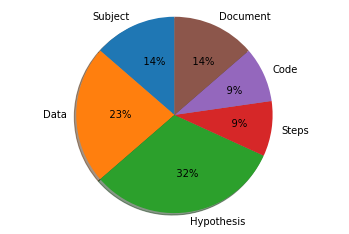

In [185]:
labels = 'Subject',	'Data',	'Hypothesis', 'Steps', 'Code', 'Document'
fracs = [3, 5, 7, 2, 3, 2]
fig1, ax1 = plt.subplots()
ax1.pie(labels=labels, autopct='%5.0f%%', x=index, shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [19]:
fig = go.Figure(data=go.Scatter(x=rating3['Effects'],y=rating3['Type'],mode='lines')) # hover text goes here
fig.update_layout(title='Effects depending on the Type of Cannabis leaf',xaxis_title="Effects",yaxis_title="Type")    
fig.show()

In [244]:
rating.reset_index(inplace=True)
rating.drop(['index'], axis=1, inplace=True)
rating.drop(['level_0'], axis=1, inplace=True)

In [20]:
rating3

,Strain,Type,Effects,Flavor,Description
Rating,,,,,
0.0,White-Ryder,sativa,"Uplifted,Euphoric,Happy,Sleepy,Creative","Sweet,Earthy,Pungent",White Ryder is Riot Seeds’ attempt to create a...
2.8,Blue-Bayou,sativa,"Giggly,Uplifted,Creative,Happy,Sleepy",Sweet,Blue Bayou can only be described as a comprehe...
3.0,White-Strawberry,sativa,"Uplifted,Focused,Sleepy,Relaxed,Tingly","Tropical,Flowery,Pungent",White Strawberry is the flavorful cross of The...
3.1,Raw-Diesel,hybrid,"Relaxed,Sleepy,Uplifted,Hungry,Happy","Earthy,Diesel,Citrus",G-13 Labs created Raw Diesel by crossing NYC D...
3.2,Red-Widow,indica,"Relaxed,Sleepy,Happy,Hungry,Euphoric","Woody,Earthy,Lemon",The offspring of Northern Lights #5 and Skunk ...
3.3,Mexican-Sativa,sativa,"Tingly,Uplifted,Relaxed,Aroused,Creative","Woody,Earthy,Nutty",Mexican Sativa is a 70/30 sativa-dominant hybr...
3.4,Snow-Diesel,sativa,"Uplifted,Euphoric,Giggly,Energetic,Talkative","Sweet,Flowery,Earthy","Snow Diesel, bred by House of Funk Genetics, i..."
3.5,Southern-Lights,sativa,"Uplifted,Tingly,Relaxed,Euphoric,Aroused","Sweet,Berry,Earthy","Southern Lights, formerly known as White Star,..."
3.6,West-Og,sativa,"Relaxed,Sleepy,Focused,Talkative,Happy","Woody,Lemon,Spicy/Herbal",Sweet Lafayette is an 80% indica strain with m...


In [27]:
rating3.shape

(23, 5)

In [41]:
rating3.index

Float64Index([0.0, 2.8, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0,
              4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0],
             dtype='float64', name='Rating')

In [42]:
len(rating3.index)

23

In [21]:
rating3['Effects']

Rating
0.0           Uplifted,Euphoric,Happy,Sleepy,Creative
2.8             Giggly,Uplifted,Creative,Happy,Sleepy
3.0            Uplifted,Focused,Sleepy,Relaxed,Tingly
3.1              Relaxed,Sleepy,Uplifted,Hungry,Happy
3.2              Relaxed,Sleepy,Happy,Hungry,Euphoric
3.3          Tingly,Uplifted,Relaxed,Aroused,Creative
3.4      Uplifted,Euphoric,Giggly,Energetic,Talkative
3.5          Uplifted,Tingly,Relaxed,Euphoric,Aroused
3.6            Relaxed,Sleepy,Focused,Talkative,Happy
3.7    Uplifted,Talkative,Energetic,Euphoric,Creative
3.8            Uplifted,Euphoric,Giggly,Happy,Relaxed
3.9          Uplifted,Sleepy,Creative,Happy,Talkative
4.0                                  Uplifted,Relaxed
4.1          Uplifted,Relaxed,Euphoric,Focused,Giggly
4.2            Uplifted,Relaxed,Happy,Sleepy,Creative
4.3           Uplifted,Relaxed,Happy,Euphoric,Focused
4.4          Uplifted,Talkative,Happy,Euphoric,Giggly
4.5       Uplifted,Talkative,Euphoric,Happy,Energetic
4.6        Uplifted,T

In [44]:
rating4 = rating3.drop(rating3.index[12])
rating4

,Strain,Type,Effects,Flavor,Description
Rating,,,,,
0.0,White-Ryder,sativa,"Uplifted,Euphoric,Happy,Sleepy,Creative","Sweet,Earthy,Pungent",White Ryder is Riot Seeds’ attempt to create a...
2.8,Blue-Bayou,sativa,"Giggly,Uplifted,Creative,Happy,Sleepy",Sweet,Blue Bayou can only be described as a comprehe...
3.0,White-Strawberry,sativa,"Uplifted,Focused,Sleepy,Relaxed,Tingly","Tropical,Flowery,Pungent",White Strawberry is the flavorful cross of The...
3.1,Raw-Diesel,hybrid,"Relaxed,Sleepy,Uplifted,Hungry,Happy","Earthy,Diesel,Citrus",G-13 Labs created Raw Diesel by crossing NYC D...
3.2,Red-Widow,indica,"Relaxed,Sleepy,Happy,Hungry,Euphoric","Woody,Earthy,Lemon",The offspring of Northern Lights #5 and Skunk ...
3.3,Mexican-Sativa,sativa,"Tingly,Uplifted,Relaxed,Aroused,Creative","Woody,Earthy,Nutty",Mexican Sativa is a 70/30 sativa-dominant hybr...
3.4,Snow-Diesel,sativa,"Uplifted,Euphoric,Giggly,Energetic,Talkative","Sweet,Flowery,Earthy","Snow Diesel, bred by House of Funk Genetics, i..."
3.5,Southern-Lights,sativa,"Uplifted,Tingly,Relaxed,Euphoric,Aroused","Sweet,Berry,Earthy","Southern Lights, formerly known as White Star,..."
3.6,West-Og,sativa,"Relaxed,Sleepy,Focused,Talkative,Happy","Woody,Lemon,Spicy/Herbal",Sweet Lafayette is an 80% indica strain with m...


In [45]:
rating4.shape

(22, 5)

In [46]:
rating4['Effects']

Rating
0.0           Uplifted,Euphoric,Happy,Sleepy,Creative
2.8             Giggly,Uplifted,Creative,Happy,Sleepy
3.0            Uplifted,Focused,Sleepy,Relaxed,Tingly
3.1              Relaxed,Sleepy,Uplifted,Hungry,Happy
3.2              Relaxed,Sleepy,Happy,Hungry,Euphoric
3.3          Tingly,Uplifted,Relaxed,Aroused,Creative
3.4      Uplifted,Euphoric,Giggly,Energetic,Talkative
3.5          Uplifted,Tingly,Relaxed,Euphoric,Aroused
3.6            Relaxed,Sleepy,Focused,Talkative,Happy
3.7    Uplifted,Talkative,Energetic,Euphoric,Creative
3.8            Uplifted,Euphoric,Giggly,Happy,Relaxed
3.9          Uplifted,Sleepy,Creative,Happy,Talkative
4.1          Uplifted,Relaxed,Euphoric,Focused,Giggly
4.2            Uplifted,Relaxed,Happy,Sleepy,Creative
4.3           Uplifted,Relaxed,Happy,Euphoric,Focused
4.4          Uplifted,Talkative,Happy,Euphoric,Giggly
4.5       Uplifted,Talkative,Euphoric,Happy,Energetic
4.6        Uplifted,Talkative,Happy,Relaxed,Energetic
4.7            Uplift

In [53]:
rating5 = rating4['Effects'].astype(str)
rating5

Rating
0.0           Uplifted,Euphoric,Happy,Sleepy,Creative
2.8             Giggly,Uplifted,Creative,Happy,Sleepy
3.0            Uplifted,Focused,Sleepy,Relaxed,Tingly
3.1              Relaxed,Sleepy,Uplifted,Hungry,Happy
3.2              Relaxed,Sleepy,Happy,Hungry,Euphoric
3.3          Tingly,Uplifted,Relaxed,Aroused,Creative
3.4      Uplifted,Euphoric,Giggly,Energetic,Talkative
3.5          Uplifted,Tingly,Relaxed,Euphoric,Aroused
3.6            Relaxed,Sleepy,Focused,Talkative,Happy
3.7    Uplifted,Talkative,Energetic,Euphoric,Creative
3.8            Uplifted,Euphoric,Giggly,Happy,Relaxed
3.9          Uplifted,Sleepy,Creative,Happy,Talkative
4.1          Uplifted,Relaxed,Euphoric,Focused,Giggly
4.2            Uplifted,Relaxed,Happy,Sleepy,Creative
4.3           Uplifted,Relaxed,Happy,Euphoric,Focused
4.4          Uplifted,Talkative,Happy,Euphoric,Giggly
4.5       Uplifted,Talkative,Euphoric,Happy,Energetic
4.6        Uplifted,Talkative,Happy,Relaxed,Energetic
4.7            Uplift

In [54]:
rating4['Effects'].dtype

dtype('O')

In [56]:
rating4['new_column'] = rating4['Effects'].str.split(',')
rating4

,Strain,Type,Effects,Flavor,Description,new_column
Rating,,,,,,
0.0,White-Ryder,sativa,"Uplifted,Euphoric,Happy,Sleepy,Creative","Sweet,Earthy,Pungent",White Ryder is Riot Seeds’ attempt to create a...,"[Uplifted, Euphoric, Happy, Sleepy, Creative]"
2.8,Blue-Bayou,sativa,"Giggly,Uplifted,Creative,Happy,Sleepy",Sweet,Blue Bayou can only be described as a comprehe...,"[Giggly, Uplifted, Creative, Happy, Sleepy]"
3.0,White-Strawberry,sativa,"Uplifted,Focused,Sleepy,Relaxed,Tingly","Tropical,Flowery,Pungent",White Strawberry is the flavorful cross of The...,"[Uplifted, Focused, Sleepy, Relaxed, Tingly]"
3.1,Raw-Diesel,hybrid,"Relaxed,Sleepy,Uplifted,Hungry,Happy","Earthy,Diesel,Citrus",G-13 Labs created Raw Diesel by crossing NYC D...,"[Relaxed, Sleepy, Uplifted, Hungry, Happy]"
3.2,Red-Widow,indica,"Relaxed,Sleepy,Happy,Hungry,Euphoric","Woody,Earthy,Lemon",The offspring of Northern Lights #5 and Skunk ...,"[Relaxed, Sleepy, Happy, Hungry, Euphoric]"
3.3,Mexican-Sativa,sativa,"Tingly,Uplifted,Relaxed,Aroused,Creative","Woody,Earthy,Nutty",Mexican Sativa is a 70/30 sativa-dominant hybr...,"[Tingly, Uplifted, Relaxed, Aroused, Creative]"
3.4,Snow-Diesel,sativa,"Uplifted,Euphoric,Giggly,Energetic,Talkative","Sweet,Flowery,Earthy","Snow Diesel, bred by House of Funk Genetics, i...","[Uplifted, Euphoric, Giggly, Energetic, Talkat..."
3.5,Southern-Lights,sativa,"Uplifted,Tingly,Relaxed,Euphoric,Aroused","Sweet,Berry,Earthy","Southern Lights, formerly known as White Star,...","[Uplifted, Tingly, Relaxed, Euphoric, Aroused]"
3.6,West-Og,sativa,"Relaxed,Sleepy,Focused,Talkative,Happy","Woody,Lemon,Spicy/Herbal",Sweet Lafayette is an 80% indica strain with m...,"[Relaxed, Sleepy, Focused, Talkative, Happy]"


In [57]:
rating4['new_column']

Rating
0.0        [Uplifted, Euphoric, Happy, Sleepy, Creative]
2.8          [Giggly, Uplifted, Creative, Happy, Sleepy]
3.0         [Uplifted, Focused, Sleepy, Relaxed, Tingly]
3.1           [Relaxed, Sleepy, Uplifted, Hungry, Happy]
3.2           [Relaxed, Sleepy, Happy, Hungry, Euphoric]
3.3       [Tingly, Uplifted, Relaxed, Aroused, Creative]
3.4    [Uplifted, Euphoric, Giggly, Energetic, Talkat...
3.5       [Uplifted, Tingly, Relaxed, Euphoric, Aroused]
3.6         [Relaxed, Sleepy, Focused, Talkative, Happy]
3.7    [Uplifted, Talkative, Energetic, Euphoric, Cre...
3.8         [Uplifted, Euphoric, Giggly, Happy, Relaxed]
3.9       [Uplifted, Sleepy, Creative, Happy, Talkative]
4.1       [Uplifted, Relaxed, Euphoric, Focused, Giggly]
4.2         [Uplifted, Relaxed, Happy, Sleepy, Creative]
4.3        [Uplifted, Relaxed, Happy, Euphoric, Focused]
4.4       [Uplifted, Talkative, Happy, Euphoric, Giggly]
4.5    [Uplifted, Talkative, Euphoric, Happy, Energetic]
4.6     [Uplifted, Talka

In [59]:
rating4['Firsteffect'] = rating4['new_column'].str[0]
rating4

,Strain,Type,Effects,Flavor,Description,new_column,Firsteffect
Rating,,,,,,,
0.0,White-Ryder,sativa,"Uplifted,Euphoric,Happy,Sleepy,Creative","Sweet,Earthy,Pungent",White Ryder is Riot Seeds’ attempt to create a...,"[Uplifted, Euphoric, Happy, Sleepy, Creative]",Uplifted
2.8,Blue-Bayou,sativa,"Giggly,Uplifted,Creative,Happy,Sleepy",Sweet,Blue Bayou can only be described as a comprehe...,"[Giggly, Uplifted, Creative, Happy, Sleepy]",Giggly
3.0,White-Strawberry,sativa,"Uplifted,Focused,Sleepy,Relaxed,Tingly","Tropical,Flowery,Pungent",White Strawberry is the flavorful cross of The...,"[Uplifted, Focused, Sleepy, Relaxed, Tingly]",Uplifted
3.1,Raw-Diesel,hybrid,"Relaxed,Sleepy,Uplifted,Hungry,Happy","Earthy,Diesel,Citrus",G-13 Labs created Raw Diesel by crossing NYC D...,"[Relaxed, Sleepy, Uplifted, Hungry, Happy]",Relaxed
3.2,Red-Widow,indica,"Relaxed,Sleepy,Happy,Hungry,Euphoric","Woody,Earthy,Lemon",The offspring of Northern Lights #5 and Skunk ...,"[Relaxed, Sleepy, Happy, Hungry, Euphoric]",Relaxed
3.3,Mexican-Sativa,sativa,"Tingly,Uplifted,Relaxed,Aroused,Creative","Woody,Earthy,Nutty",Mexican Sativa is a 70/30 sativa-dominant hybr...,"[Tingly, Uplifted, Relaxed, Aroused, Creative]",Tingly
3.4,Snow-Diesel,sativa,"Uplifted,Euphoric,Giggly,Energetic,Talkative","Sweet,Flowery,Earthy","Snow Diesel, bred by House of Funk Genetics, i...","[Uplifted, Euphoric, Giggly, Energetic, Talkat...",Uplifted
3.5,Southern-Lights,sativa,"Uplifted,Tingly,Relaxed,Euphoric,Aroused","Sweet,Berry,Earthy","Southern Lights, formerly known as White Star,...","[Uplifted, Tingly, Relaxed, Euphoric, Aroused]",Uplifted
3.6,West-Og,sativa,"Relaxed,Sleepy,Focused,Talkative,Happy","Woody,Lemon,Spicy/Herbal",Sweet Lafayette is an 80% indica strain with m...,"[Relaxed, Sleepy, Focused, Talkative, Happy]",Relaxed


In [60]:
rating4['Secondeffect'] = rating4['new_column'].str[1]
rating4

,Strain,Type,Effects,Flavor,Description,new_column,Firsteffect,Secondeffect
Rating,,,,,,,,
0.0,White-Ryder,sativa,"Uplifted,Euphoric,Happy,Sleepy,Creative","Sweet,Earthy,Pungent",White Ryder is Riot Seeds’ attempt to create a...,"[Uplifted, Euphoric, Happy, Sleepy, Creative]",Uplifted,Euphoric
2.8,Blue-Bayou,sativa,"Giggly,Uplifted,Creative,Happy,Sleepy",Sweet,Blue Bayou can only be described as a comprehe...,"[Giggly, Uplifted, Creative, Happy, Sleepy]",Giggly,Uplifted
3.0,White-Strawberry,sativa,"Uplifted,Focused,Sleepy,Relaxed,Tingly","Tropical,Flowery,Pungent",White Strawberry is the flavorful cross of The...,"[Uplifted, Focused, Sleepy, Relaxed, Tingly]",Uplifted,Focused
3.1,Raw-Diesel,hybrid,"Relaxed,Sleepy,Uplifted,Hungry,Happy","Earthy,Diesel,Citrus",G-13 Labs created Raw Diesel by crossing NYC D...,"[Relaxed, Sleepy, Uplifted, Hungry, Happy]",Relaxed,Sleepy
3.2,Red-Widow,indica,"Relaxed,Sleepy,Happy,Hungry,Euphoric","Woody,Earthy,Lemon",The offspring of Northern Lights #5 and Skunk ...,"[Relaxed, Sleepy, Happy, Hungry, Euphoric]",Relaxed,Sleepy
3.3,Mexican-Sativa,sativa,"Tingly,Uplifted,Relaxed,Aroused,Creative","Woody,Earthy,Nutty",Mexican Sativa is a 70/30 sativa-dominant hybr...,"[Tingly, Uplifted, Relaxed, Aroused, Creative]",Tingly,Uplifted
3.4,Snow-Diesel,sativa,"Uplifted,Euphoric,Giggly,Energetic,Talkative","Sweet,Flowery,Earthy","Snow Diesel, bred by House of Funk Genetics, i...","[Uplifted, Euphoric, Giggly, Energetic, Talkat...",Uplifted,Euphoric
3.5,Southern-Lights,sativa,"Uplifted,Tingly,Relaxed,Euphoric,Aroused","Sweet,Berry,Earthy","Southern Lights, formerly known as White Star,...","[Uplifted, Tingly, Relaxed, Euphoric, Aroused]",Uplifted,Tingly
3.6,West-Og,sativa,"Relaxed,Sleepy,Focused,Talkative,Happy","Woody,Lemon,Spicy/Herbal",Sweet Lafayette is an 80% indica strain with m...,"[Relaxed, Sleepy, Focused, Talkative, Happy]",Relaxed,Sleepy


In [61]:
rating4['Thirdeffect'] = rating4['new_column'].str[2]
rating4

,Strain,Type,Effects,Flavor,Description,new_column,Firsteffect,Secondeffect,Thirdeffect
Rating,,,,,,,,,
0.0,White-Ryder,sativa,"Uplifted,Euphoric,Happy,Sleepy,Creative","Sweet,Earthy,Pungent",White Ryder is Riot Seeds’ attempt to create a...,"[Uplifted, Euphoric, Happy, Sleepy, Creative]",Uplifted,Euphoric,Happy
2.8,Blue-Bayou,sativa,"Giggly,Uplifted,Creative,Happy,Sleepy",Sweet,Blue Bayou can only be described as a comprehe...,"[Giggly, Uplifted, Creative, Happy, Sleepy]",Giggly,Uplifted,Creative
3.0,White-Strawberry,sativa,"Uplifted,Focused,Sleepy,Relaxed,Tingly","Tropical,Flowery,Pungent",White Strawberry is the flavorful cross of The...,"[Uplifted, Focused, Sleepy, Relaxed, Tingly]",Uplifted,Focused,Sleepy
3.1,Raw-Diesel,hybrid,"Relaxed,Sleepy,Uplifted,Hungry,Happy","Earthy,Diesel,Citrus",G-13 Labs created Raw Diesel by crossing NYC D...,"[Relaxed, Sleepy, Uplifted, Hungry, Happy]",Relaxed,Sleepy,Uplifted
3.2,Red-Widow,indica,"Relaxed,Sleepy,Happy,Hungry,Euphoric","Woody,Earthy,Lemon",The offspring of Northern Lights #5 and Skunk ...,"[Relaxed, Sleepy, Happy, Hungry, Euphoric]",Relaxed,Sleepy,Happy
3.3,Mexican-Sativa,sativa,"Tingly,Uplifted,Relaxed,Aroused,Creative","Woody,Earthy,Nutty",Mexican Sativa is a 70/30 sativa-dominant hybr...,"[Tingly, Uplifted, Relaxed, Aroused, Creative]",Tingly,Uplifted,Relaxed
3.4,Snow-Diesel,sativa,"Uplifted,Euphoric,Giggly,Energetic,Talkative","Sweet,Flowery,Earthy","Snow Diesel, bred by House of Funk Genetics, i...","[Uplifted, Euphoric, Giggly, Energetic, Talkat...",Uplifted,Euphoric,Giggly
3.5,Southern-Lights,sativa,"Uplifted,Tingly,Relaxed,Euphoric,Aroused","Sweet,Berry,Earthy","Southern Lights, formerly known as White Star,...","[Uplifted, Tingly, Relaxed, Euphoric, Aroused]",Uplifted,Tingly,Relaxed
3.6,West-Og,sativa,"Relaxed,Sleepy,Focused,Talkative,Happy","Woody,Lemon,Spicy/Herbal",Sweet Lafayette is an 80% indica strain with m...,"[Relaxed, Sleepy, Focused, Talkative, Happy]",Relaxed,Sleepy,Focused


In [62]:
rating4['Fourtheffect'] = rating4['new_column'].str[3]
rating4

,Strain,Type,Effects,Flavor,Description,new_column,Firsteffect,Secondeffect,Thirdeffect,Fourtheffect
Rating,,,,,,,,,,
0.0,White-Ryder,sativa,"Uplifted,Euphoric,Happy,Sleepy,Creative","Sweet,Earthy,Pungent",White Ryder is Riot Seeds’ attempt to create a...,"[Uplifted, Euphoric, Happy, Sleepy, Creative]",Uplifted,Euphoric,Happy,Sleepy
2.8,Blue-Bayou,sativa,"Giggly,Uplifted,Creative,Happy,Sleepy",Sweet,Blue Bayou can only be described as a comprehe...,"[Giggly, Uplifted, Creative, Happy, Sleepy]",Giggly,Uplifted,Creative,Happy
3.0,White-Strawberry,sativa,"Uplifted,Focused,Sleepy,Relaxed,Tingly","Tropical,Flowery,Pungent",White Strawberry is the flavorful cross of The...,"[Uplifted, Focused, Sleepy, Relaxed, Tingly]",Uplifted,Focused,Sleepy,Relaxed
3.1,Raw-Diesel,hybrid,"Relaxed,Sleepy,Uplifted,Hungry,Happy","Earthy,Diesel,Citrus",G-13 Labs created Raw Diesel by crossing NYC D...,"[Relaxed, Sleepy, Uplifted, Hungry, Happy]",Relaxed,Sleepy,Uplifted,Hungry
3.2,Red-Widow,indica,"Relaxed,Sleepy,Happy,Hungry,Euphoric","Woody,Earthy,Lemon",The offspring of Northern Lights #5 and Skunk ...,"[Relaxed, Sleepy, Happy, Hungry, Euphoric]",Relaxed,Sleepy,Happy,Hungry
3.3,Mexican-Sativa,sativa,"Tingly,Uplifted,Relaxed,Aroused,Creative","Woody,Earthy,Nutty",Mexican Sativa is a 70/30 sativa-dominant hybr...,"[Tingly, Uplifted, Relaxed, Aroused, Creative]",Tingly,Uplifted,Relaxed,Aroused
3.4,Snow-Diesel,sativa,"Uplifted,Euphoric,Giggly,Energetic,Talkative","Sweet,Flowery,Earthy","Snow Diesel, bred by House of Funk Genetics, i...","[Uplifted, Euphoric, Giggly, Energetic, Talkat...",Uplifted,Euphoric,Giggly,Energetic
3.5,Southern-Lights,sativa,"Uplifted,Tingly,Relaxed,Euphoric,Aroused","Sweet,Berry,Earthy","Southern Lights, formerly known as White Star,...","[Uplifted, Tingly, Relaxed, Euphoric, Aroused]",Uplifted,Tingly,Relaxed,Euphoric
3.6,West-Og,sativa,"Relaxed,Sleepy,Focused,Talkative,Happy","Woody,Lemon,Spicy/Herbal",Sweet Lafayette is an 80% indica strain with m...,"[Relaxed, Sleepy, Focused, Talkative, Happy]",Relaxed,Sleepy,Focused,Talkative


In [156]:
rating4.shape

(22, 10)

In [157]:
rating4

,Strain,Type,Effects,Flavor,Description,new_column,Firsteffect,Secondeffect,Thirdeffect,Fourtheffect
Rating,,,,,,,,,,
0.0,White-Ryder,sativa,"Uplifted,Euphoric,Happy,Sleepy,Creative","Sweet,Earthy,Pungent",White Ryder is Riot Seeds’ attempt to create a...,"[Uplifted, Euphoric, Happy, Sleepy, Creative]",3,0,5,8
2.8,Blue-Bayou,sativa,"Giggly,Uplifted,Creative,Happy,Sleepy",Sweet,Blue Bayou can only be described as a comprehe...,"[Giggly, Uplifted, Creative, Happy, Sleepy]",0,7,0,5
3.0,White-Strawberry,sativa,"Uplifted,Focused,Sleepy,Relaxed,Tingly","Tropical,Flowery,Pungent",White Strawberry is the flavorful cross of The...,"[Uplifted, Focused, Sleepy, Relaxed, Tingly]",3,1,7,7
3.1,Raw-Diesel,hybrid,"Relaxed,Sleepy,Uplifted,Hungry,Happy","Earthy,Diesel,Citrus",G-13 Labs created Raw Diesel by crossing NYC D...,"[Relaxed, Sleepy, Uplifted, Hungry, Happy]",1,4,8,6
3.2,Red-Widow,indica,"Relaxed,Sleepy,Happy,Hungry,Euphoric","Woody,Earthy,Lemon",The offspring of Northern Lights #5 and Skunk ...,"[Relaxed, Sleepy, Happy, Hungry, Euphoric]",1,4,5,6
3.3,Mexican-Sativa,sativa,"Tingly,Uplifted,Relaxed,Aroused,Creative","Woody,Earthy,Nutty",Mexican Sativa is a 70/30 sativa-dominant hybr...,"[Tingly, Uplifted, Relaxed, Aroused, Creative]",2,7,6,0
3.4,Snow-Diesel,sativa,"Uplifted,Euphoric,Giggly,Energetic,Talkative","Sweet,Flowery,Earthy","Snow Diesel, bred by House of Funk Genetics, i...","[Uplifted, Euphoric, Giggly, Energetic, Talkat...",3,0,4,1
3.5,Southern-Lights,sativa,"Uplifted,Tingly,Relaxed,Euphoric,Aroused","Sweet,Berry,Earthy","Southern Lights, formerly known as White Star,...","[Uplifted, Tingly, Relaxed, Euphoric, Aroused]",3,6,6,2
3.6,West-Og,sativa,"Relaxed,Sleepy,Focused,Talkative,Happy","Woody,Lemon,Spicy/Herbal",Sweet Lafayette is an 80% indica strain with m...,"[Relaxed, Sleepy, Focused, Talkative, Happy]",1,4,3,9


In [78]:
rating4.columns

Index(['Strain', 'Type', 'Effects', 'Flavor', 'Description', 'new_column',
       'Firsteffect', 'Secondeffect', 'Thirdeffect', 'Fourtheffect'],
      dtype='object')

In [89]:
rating4[['Firsteffect', 'Secondeffect', 'Thirdeffect', 'Fourtheffect']].values

array([['Uplifted', 'Euphoric', 'Happy', 'Sleepy'],
       ['Giggly', 'Uplifted', 'Creative', 'Happy'],
       ['Uplifted', 'Focused', 'Sleepy', 'Relaxed'],
       ['Relaxed', 'Sleepy', 'Uplifted', 'Hungry'],
       ['Relaxed', 'Sleepy', 'Happy', 'Hungry'],
       ['Tingly', 'Uplifted', 'Relaxed', 'Aroused'],
       ['Uplifted', 'Euphoric', 'Giggly', 'Energetic'],
       ['Uplifted', 'Tingly', 'Relaxed', 'Euphoric'],
       ['Relaxed', 'Sleepy', 'Focused', 'Talkative'],
       ['Uplifted', 'Talkative', 'Energetic', 'Euphoric'],
       ['Uplifted', 'Euphoric', 'Giggly', 'Happy'],
       ['Uplifted', 'Sleepy', 'Creative', 'Happy'],
       ['Uplifted', 'Relaxed', 'Euphoric', 'Focused'],
       ['Uplifted', 'Relaxed', 'Happy', 'Sleepy'],
       ['Uplifted', 'Relaxed', 'Happy', 'Euphoric'],
       ['Uplifted', 'Talkative', 'Happy', 'Euphoric'],
       ['Uplifted', 'Talkative', 'Euphoric', 'Happy'],
       ['Uplifted', 'Talkative', 'Happy', 'Relaxed'],
       ['Uplifted', 'Relaxed', 'Happy',

In [95]:
moda = rating4[['Firsteffect', 'Secondeffect', 'Thirdeffect', 'Fourtheffect']].mode()
moda

,Firsteffect,Secondeffect,Thirdeffect,Fourtheffect
0,Uplifted,Relaxed,Happy,Euphoric
1,NaN,NaN,NaN,Happy


In [143]:
rating4['Firsteffect'].values

array([3, 0, 3, 1, 1, 2, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [144]:
rating4['Secondeffect'].values

array([0, 7, 1, 4, 4, 7, 0, 6, 4, 5, 0, 4, 3, 3, 3, 5, 5, 5, 3, 2, 3, 3])

In [141]:
go.FigureWidget

plotly.graph_objs._figurewidget.FigureWidget

In [103]:
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
rating4['Firsteffect'] = le.fit_transform(rating4['Firsteffect'])
# Sunny: 2, Overcast: 0, Rainy:1
print(rating4['Firsteffect'])

Rating
0.0    3
2.8    0
3.0    3
3.1    1
3.2    1
3.3    2
3.4    3
3.5    3
3.6    1
3.7    3
3.8    3
3.9    3
4.1    3
4.2    3
4.3    3
4.4    3
4.5    3
4.6    3
4.7    3
4.8    3
4.9    3
5.0    3
Name: Firsteffect, dtype: int64


In [186]:
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
rating4['Secondeffect'] = le.fit_transform(rating4['Secondeffect'])
print(rating4['Secondeffect'])

Rating
0.0    0
2.8    7
3.0    1
3.1    4
3.2    4
3.3    7
3.4    0
3.5    6
3.6    4
3.7    5
3.8    0
3.9    4
4.1    3
4.2    3
4.3    3
4.4    5
4.5    5
4.6    5
4.7    3
4.8    2
4.9    3
5.0    3
Name: Secondeffect, dtype: int64


In [110]:
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
rating4['Thirdeffect'] = le.fit_transform(rating4['Thirdeffect'])
print(rating4['Thirdeffect'])

Rating
0.0    5
2.8    0
3.0    7
3.1    8
3.2    5
3.3    6
3.4    4
3.5    6
3.6    3
3.7    1
3.8    4
3.9    0
4.1    2
4.2    5
4.3    5
4.4    5
4.5    2
4.6    5
4.7    5
4.8    6
4.9    2
5.0    0
Name: Thirdeffect, dtype: int64


In [112]:
rating4['Thirdeffect'].values

array([5, 0, 7, 8, 5, 6, 4, 6, 3, 1, 4, 0, 2, 5, 5, 5, 2, 5, 5, 6, 2, 0])

In [111]:
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
rating4['Fourtheffect'] = le.fit_transform(rating4['Fourtheffect'])
print(rating4['Fourtheffect'])

Rating
0.0    8
2.8    5
3.0    7
3.1    6
3.2    6
3.3    0
3.4    1
3.5    2
3.6    9
3.7    2
3.8    5
3.9    5
4.1    3
4.2    8
4.3    2
4.4    2
4.5    5
4.6    7
4.7    2
4.8    4
4.9    4
5.0    5
Name: Fourtheffect, dtype: int64


In [94]:
import numpy as np
import matplotlib.pyplot as plt

In [114]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


[Text(0, 0.5, 'Effects'),
 (-1.0, 10.0),
 Text(0.5, 0, 'Rating'),
 Text(0.5, 1.0, 'Effects')]

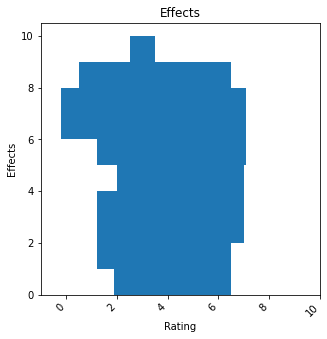

In [166]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.bar(rating4.index, rating4['Firsteffect'],rating4['Secondeffect'], rating4['Thirdeffect'])
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')
ax.set(xlim=[-1, 10], xlabel='Rating', ylabel='Effects',
       title='Effects')

In [170]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12a54d160>,
      dtype=object)

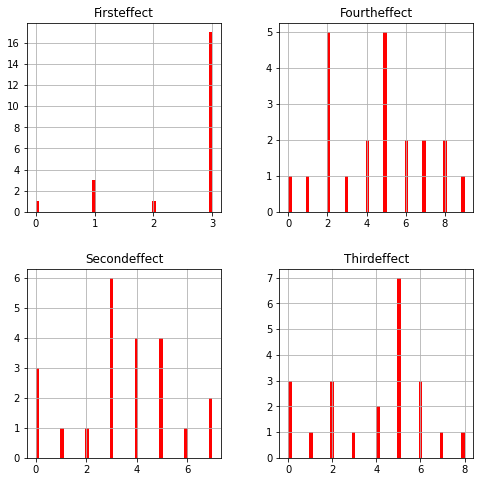

In [204]:
rating4[['Firsteffect','Secondeffect','Thirdeffect', 'Fourtheffect']].hist(figsize=(8, 8), color='r', alpha=1, bins=50)

<Figure size 86400x72000 with 0 Axes>

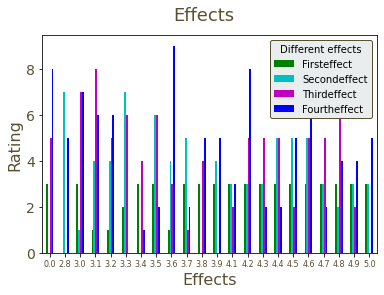

In [203]:
plt.figure(figsize=(1200, 1000))

rating4.plot(kind="bar",label='Effects',align='center',color=["g","c","m","b"])

plt.legend(title="Different effects",loc='top_right',edgecolor="#5A5034",facecolor="#EAEDED",framealpha=1, fontsize=10)
plt.suptitle('Effects', size=18, color="#5A5034")
plt.xlabel("Effects", size=16, color="#5A5034")
plt.ylabel("Rating", size=16, color="#5A5034")
plt.xticks(rotation=0,FontSize=8,color="#5A5034")
plt.yticks(rotation=0,FontSize=14,color="#5A5034")

#plt.savefig('Total_deaths_by_covid.png')
plt.show()

In [162]:
fig = go.Figure(rating4=go.Scatter(x=rating4[['Firsteffect','Secondeffect', 'Thirdeffect', 'Fourtheffect']],                    y=rating['Type'], mode='lines')) # hover text goes here
fig.update_layout(title='Effects over rating',xaxis_title="Effects",yaxis_title="Number of rating")
fig.show()

TypeError: invalid Figure property: rating4

In [118]:
fig, ax = plt.subplots(figsize=(4, 4))
rating4(columns=['Firsteffect', 'Secondeffect', 'Thirdeffect', 'Fourtheffect'])
rating4.plot(kind='bar', stacked=True)
plt.setp(labels, rotation=45, horizontalalignment='right')
ax.set(xlim=[-1, 10], xlabel='Rating', ylabel='Effects',
       title='Effects')

TypeError: 'DataFrame' object is not callable

In [164]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
 
# From raw value to percentage
totals = [rating4['Firsteffect'],rating4['Secondeffect'], rating4['Thirdeffect'], rating4['Fourtheffect']]
greenBars = [rating4['Firsteffect'], totals]
orangeBars = [rating4['Secondeffect'], totals]
blueBars = [rating4['Thirdeffect'], totals]
redBars = [rating4['Fourtheffect'], totals]
 
# plot
barWidth = 0.85
names = ('Totals','Effect1','Effect2','Effect3','Effect4')
# Create green Bars
plt.bar(1, greenBars, color='#b5ffb9', edgecolor='white', width=barWidth)
# Create orange Bars
plt.bar(2, orangeBars, color='#f9bc86', edgecolor='white', width=barWidth)
# Create blue Bars
plt.bar(3, blueBars, color='#a3acff', edgecolor='white', width=barWidth)
plt.bar(4, redBars, color='#a3acff', edgecolor='white', width=barWidth) 
# Custom x axis
plt.xticks(names)
plt.xlabel("group")
 
# Show graphic
plt.show()

ValueError: setting an array element with a sequence.

In [169]:
# Create green Bars
plt.bar(greenBars, color='#b5ffb9', edgecolor='white', width=barWidth, label="group A")
# Create orange Bars
plt.bar(orangeBars, bottom=greenBars, color='#f9bc86', edgecolor='white', width=barWidth, label="group B")
# Create blue Bars
plt.bar(blueBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], color='#a3acff', edgecolor='white', width=barWidth, label="group C")
 
# Custom x axis
plt.xticks(names)
plt.xlabel("group")
 
# Add a legend
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
 
# Show graphic
plt.show()


TypeError: bar() missing 1 required positional argument: 'height'

In [122]:
from mpl_toolkits.basemap import Basemap, cm
# requires netcdf4-python (netcdf4-python.googlecode.com)
from netCDF4 import Dataset as NetCDFFile
import numpy as np
import matplotlib.pyplot as plt

# plot rainfall from NWS using special precipitation
# colormap used by the NWS, and included in basemap.

nc = NetCDFFile('../../../examples/nws_precip_conus_20061222.nc')
# data from http://water.weather.gov/precip/
prcpvar = nc.variables['amountofprecip']
data = 0.01*prcpvar[:]
latcorners = nc.variables['lat'][:]
loncorners = -nc.variables['lon'][:]
lon_0 = -nc.variables['true_lon'].getValue()
lat_0 = nc.variables['true_lat'].getValue()
# create figure and axes instances
fig = plt.figure(figsize=(8,8))
ax = fig.add_axes([0.1,0.1,0.8,0.8])
# create polar stereographic Basemap instance.
m = Basemap(projection='stere',lon_0=lon_0,lat_0=90.,lat_ts=lat_0,\
            llcrnrlat=latcorners[0],urcrnrlat=latcorners[2],\
            llcrnrlon=loncorners[0],urcrnrlon=loncorners[2],\
            rsphere=6371200.,resolution='l',area_thresh=10000)
# draw coastlines, state and country boundaries, edge of map.
m.drawcoastlines()
m.drawstates()
m.drawcountries()
# draw parallels.
parallels = np.arange(0.,90,10.)
m.drawparallels(parallels,labels=[1,0,0,0],fontsize=10)
# draw meridians
meridians = np.arange(180.,360.,10.)
m.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10)
ny = data.shape[0]; nx = data.shape[1]
lons, lats = m.makegrid(nx, ny) # get lat/lons of ny by nx evenly space grid.
x, y = m(lons, lats) # compute map proj coordinates.
# draw filled contours.
clevs = [0,1,2.5,5,7.5,10,15,20,30,40,50,70,100,150,200,250,300,400,500,600,750]
cs = m.contourf(x,y,data,clevs,cmap=cm.s3pcpn)
# add colorbar.
cbar = m.colorbar(cs,location='bottom',pad="5%")
cbar.set_label('mm')
# add title
plt.title(prcpvar.long_name+' for period ending '+prcpvar.dateofdata)
plt.show()

ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

In [171]:
import numpy as np
import matplotlib.pyplot as plt

N = 5

greenBars = [rating4['Firsteffect'], totals]
orangeBars = [rating4['Secondeffect'], totals]
blueBars = [rating4['Thirdeffect'], totals]
redBars = [rating4['Fourtheffect'], totals]

ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, Firsteffect, width, yerr=Thirdeffect)
p2 = plt.bar(ind, Secondeffect, width, yerr=womenStd)

plt.ylabel('Effects')
plt.title('Effects')
plt.xticks(ind, (('Effect1','Effect2','Effect3','Effect4'))
plt.show()


SyntaxError: invalid syntax (<ipython-input-171-ae1752a65e88>, line 20)